# Explore Exercises

## Review of Exploratory Data Analysis

### Goals of EDA

We explore the interactions of the attributes and target variable to help discover drivers of our target variable and redundant or interdependent attributes.

1. Discover features that are driving the outcome (target). (Number 1 reason to explore)
2. Learn the vast majority of our takeaways and interesting stories from the data.
3. Discover if we need to drop features, if we need to handle missing values, or if there's value to combining features.

<hr style="border:1px solid black">

### EDA Process

1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language).

2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)

### General Recipe

1. <b>Univariate Stats</b>: descriptive stats, frequencies, histograms. **We recommend doing this during prep prior to splitting into train/validate/test**, but if it is not, then it should be done first here. Why? Outliers. Running tests that assume normalcy. Scale of each variable. General "getting to know" your data.
    - Univariate means a single variable, so we'll look at .value_counts() and histograms.
    - Explore the target variable itself. What is the distribution of values?
    - Explore the categorical and qualitative variables.
    - Explore the numeric variables.
<br>
<br>
2. <b>Bivariate Stats</b>: Bivariate means two variables.
    - Plot the interactions of each variable with the target. Document your takeaways.
    - Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.
<br>
<br>
3. <b>Multivariate Stats</b> (more than 2 variables): Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing.
    - use color to represent a discrete variable and then choose a chart style based on the data types of other two variables.
<br>
<br>
4. <b>Statistical Tests</b>: If the visualizations are not crystal clear, it's important to conduct hypothesis tests.
    - With numeric to numeric, test for correlation with Pearson's R for linear and Spearman's R for non-linear relationships.
    - For numeric to categorical, compare the means of two populations or a subgroup to the population using a t-test, if your samples are normaly(ish) distributed but have different variances (as determined by calling .var() on each column/Series, ANOVA to compare means from more than 2 groups, or a Mann-Whitney u-test if the data does not match the assumptions of a t-test.
    - With categorical to categorical variables, use , chi-squared test.
    
<hr style="border:1px solid black">

### Standing Orders for Exploration

- Document your initial questions or assumptions. Write them down (in your README or notebook) so they are concrete and not in your head.

- Document your takeaways after each visualization. Even if your takeaway is, "there is nothing interesting between var1 and target".

- Document your answer to each question.

- When you run statistical tests to answer your questions, Document your null and alternative hypothesis, the test you run, the test results, and your conclusion.

- Document your takeaways, in case that wasn't clear. It is a huge component of your final deliverable/analysis.

- Document your action plan. What are your next steps and/or new questions based on what you have learned? I recommend documenting, continuing through all of your questions, and then going back and taking action only after you have answered your initial questions.

**imports**

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split

## Part 1

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

**Planning:**
Can we determine what type of Iris is being examined based on metrics taken from a study of three different species of the flower? Do we have significant indicators of what type of species we encounter based on petal or sepal lengths.

**Acquire, prepare & split your data.**

In [4]:
# connection function for accessing mysql
def get_connection(db, user=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# query to acquire the iris data
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

# function to get the data and run the query
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

# acquire the data
df = get_data()

In [5]:
# Preparation: 
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

df = prep_iris_inline(df)

In [6]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

**Univariate Stats**

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

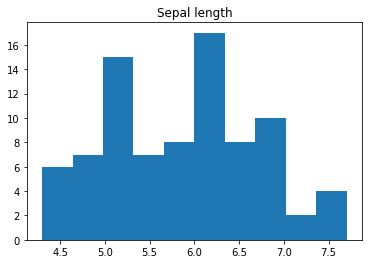

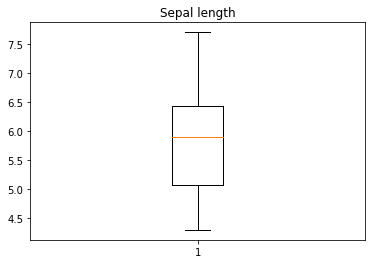

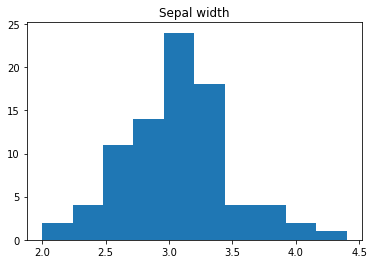

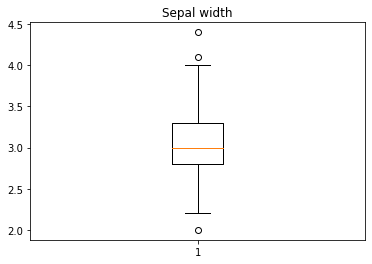

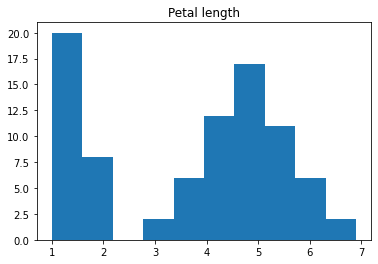

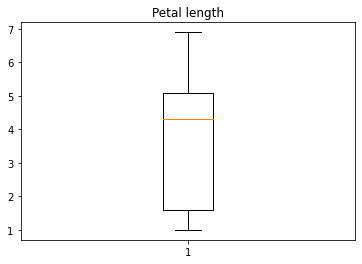

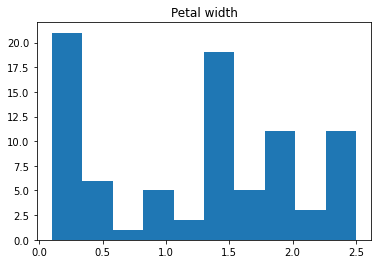

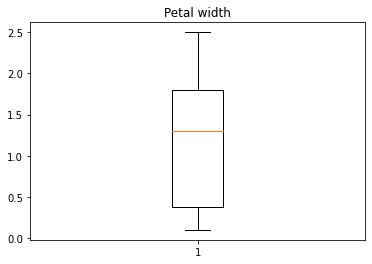

In [7]:
# Plot numeric columns
# define num_cols here:
# num_cols could be defined by datatype of float64, or just anything that isn't an object
# every thing in train.columns where the train[col] series is not an object
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()

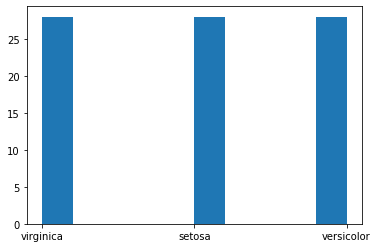

In [11]:
# Do the same process for our target, a categorical dependent variable
train.species.value_counts()

plt.hist(train.species)
plt.show()

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

**Bivariate Stats**

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

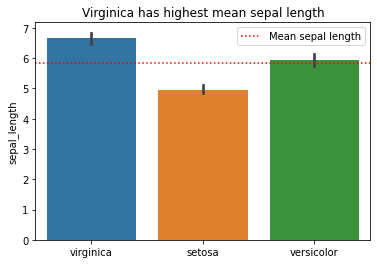

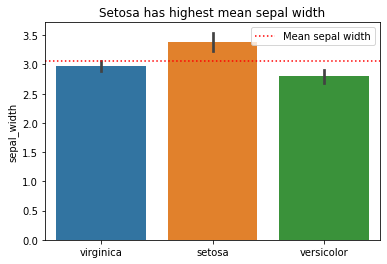

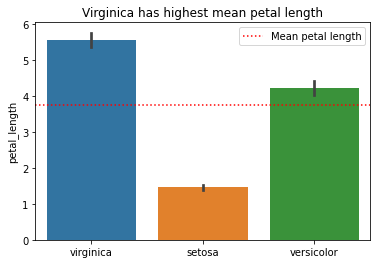

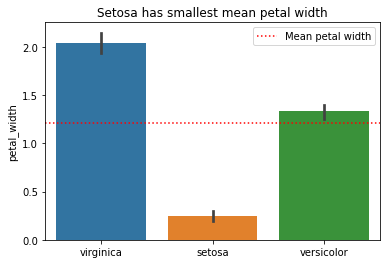

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [8]:
# we retroactively place our takeaway from this visualization as the title
plt.title("Virginica has highest mean sepal length")
# calling seaborn for a bar plot, specifying species and sepal length
sns.barplot(x="species", y="sepal_length", data=train)
# annotate a mean of the sepal length
# calculating a mean of the sepal length (for *all* the species)
mean_sepal_length = train.sepal_length.mean()
# place the calculated mean as a horizontal axis line
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

# change sepal length to sepal width, run same process
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()


plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()


plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

# Virginica descriptive statistics
# train, where train.species is virginica
train[train.species == 'virginica'].describe()

# Setosa descriptive statistics
train[train.species == 'setosa'].describe()


# Versicolor descriptive statistics
train[train.species == 'versicolor'].describe()

# alpha: 0.05

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

H_0: 

H_a: 


In [9]:


# establish variables that represent the species subset of train
# virginica = train, where train's species is virginica
virginica = train[train.species == 'virginica']
# again, for versicolor
versicolor = train[train.species == 'versicolor']\
# again, for setosa
setosa = train[train.species == 'setosa']
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [10]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840642e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

**Multivariate Stats**

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

In [ ]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

import itertools


list(itertools.combinations(train.drop(columns='species').columns, 2))

# define feature combinations with a list of tuples
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

combos[0]

# we can use aggretations to examine specific stats on our categorical target
train.groupby('species')['sepal_area'].sum()

x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        
# test it with one plot
scatter_species(x,y)

plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

In [ ]:
train.corr()
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()


pd.plotting.scatter_matrix(train)
plt.show()

sns.pairplot(train, hue='species')
plt.show()

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

## Part II

Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

## Part III

Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

In [ ]:
train.info()

**Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [ ]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

In [ ]:
virginica.hist()
plt.show()

In [ ]:
versicolor.hist()
plt.show()

In [ ]:
virginica.describe()['sepal_length']['std']

In [ ]:
versicolor.describe()['sepal_length']

In [ ]:
import scipy.stats as stats

In [ ]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [ ]:
tstat

In [ ]:
p

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05

- $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [ ]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 

In [ ]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

In [ ]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')